<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
A major US bank management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). Most of their customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

We need to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.
    

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
        
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.


<font color=darkcyan>
<font size =5>
1.1 Loading all required libraries

In [1]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [2]:
#Import the Loan Modelling data set
data = pd.read_csv('Loan_Modelling.csv') 

In [3]:
pd.read_csv('Loan_Modelling.csv') 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
# copying data to another variable to avoid any changes to original data
loans = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [5]:
loans.head(10)# Read top 10 values of the data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
loans.tail(10)# Read bottom 10 values of the data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


<font color=darkblue>
<font size =2>
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Loan Modelling Data Set

In [7]:
loans.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<font color=darkblue>
<font size =2>
# Observations : 
The dataset consists of the above 14 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [8]:
loans.shape #shape of dataset

(5000, 14)

<font color=darkblue>
<font size =2>
# Observations : 
We have 5000 rows and 14 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. All columns are integer data type, except 'CCAvg' column which is a float type.
2. 'ID' column is redundant, hence can be dropped.
3. As per the data set there are no missing values.
4. Zip Code needs to be category type as its not numerical value .
5. 'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard' need to be boolean where 'True = 1' and 'False = 0'. The cannaot be considered numerical integers.


<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [10]:
loans.isnull().values.any() # If there are any null values in data set

False

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [11]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing ZIP Code from numerical variable to categorical type

In [12]:
# Changing Type of the ZIP Code columns to category
loans['ZIPCode'] = loans['ZIPCode'].astype('category')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 541.4 KB


<font color=darkblue>
<font size =2>
# Observations : 
ZIP Code column is now a categorical variable.

<font color=darkorange>
<font size =4.5>
1.4.2 Removing redundant column "ID"

In [13]:
# Drpo S.No. column
loans.drop(["ID"], axis=1, inplace=True)
loans.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<font color=darkblue>
<font size =2>
# Observations : 
We now have a total of 13 columns.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking Unique value in each column

In [14]:
for i in loans.columns:
    print(data[i].value_counts())
    print("*" * 50)

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2

In [15]:
colm = ['Family', 'Education','Personal_Loan','Securities_Account', 'CD_Account','Online', 'CreditCard']
for i in colm:
    print(data[i].value_counts())
    print("*" * 50)


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Age, Experience, Income, CCavg,Mortgae columns need binning to consolidate  for analysis.
2. Family size with 1,2,3,4 person family are noted
3. Education mainly divided into 3 categories, '1:Under Graduate', '2:Graduate','3:Advanced/professional degree'
4. 'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard' are True or False, i.e. '1' if they have the given criteria, '0' if they don't.


<font color=darkcyan>
<font size =5>
1.5 Univariate Analysis

<font color=darkorange>
<font size =4.5>
1.5.1 Histogram of all the given columns

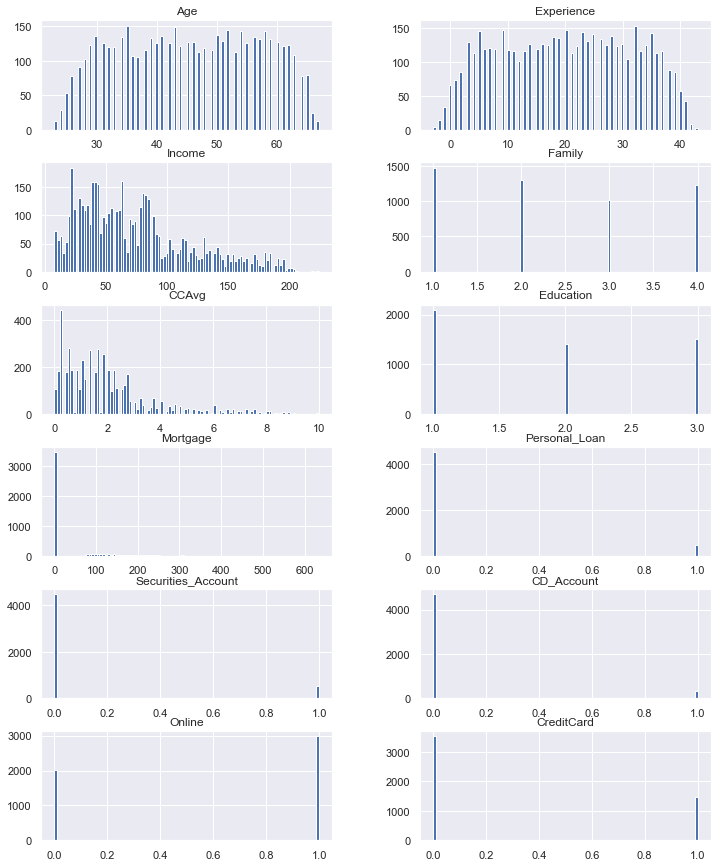

In [16]:
# Plotting a histogram of all numerical columns in the dataset
columns = list(loans)[0:13]# All columns in the data set
loans[columns].hist(stacked=False, bins=100, figsize=(12,36), layout=(14,2)); # plot histogram


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Age ,Income, CCAvg are widely distributed and will need further detailed evaluation.
2. CCAvg and income data looks right skewed.
3. We have significant customers with no mortgage loan.Needs data binning for further evaluation.
4. Majority customers donot have Securities or CD Account.
5. Majority customers are using online banking.
6. majority customers donot have other bank Credit Cards.

<font color=darkorange>
<font size =4.5>
1.5.2 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
#  Writing a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<font color=darkorange>
<font size =4.5>
1.5.2.1 Boxplot and Histogram of Age

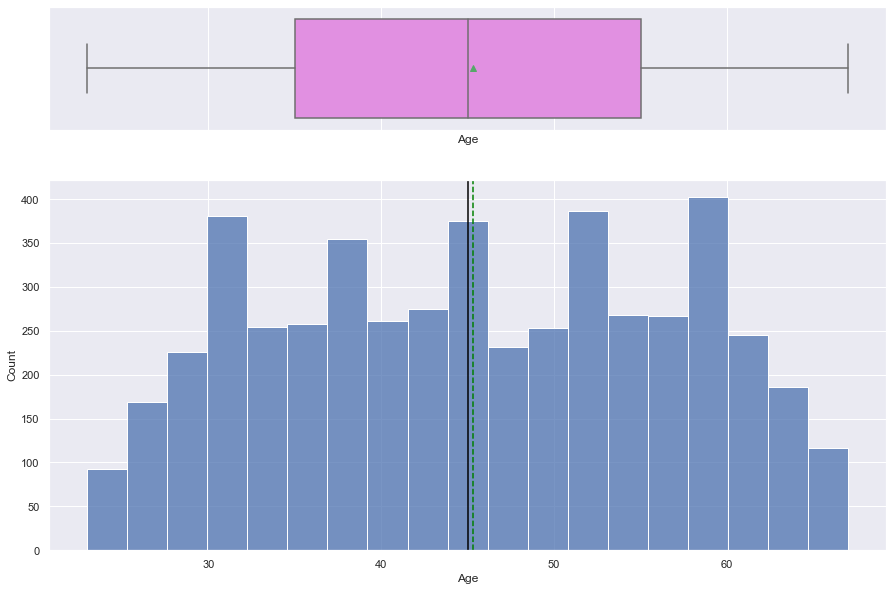

In [18]:
histogram_boxplot(data["Age"])# Plotting Age

<font color=darkblue>
<font size =2>
# Observations : 
The customer Age varies from 25 to 65 a wide age range. Maximum customers are in age range of 35 to 60. Can use binning to proper consolidate data

<font color=darkorange>
<font size =4.5>
1.5.2.2 Boxplot and Histogram of Experience

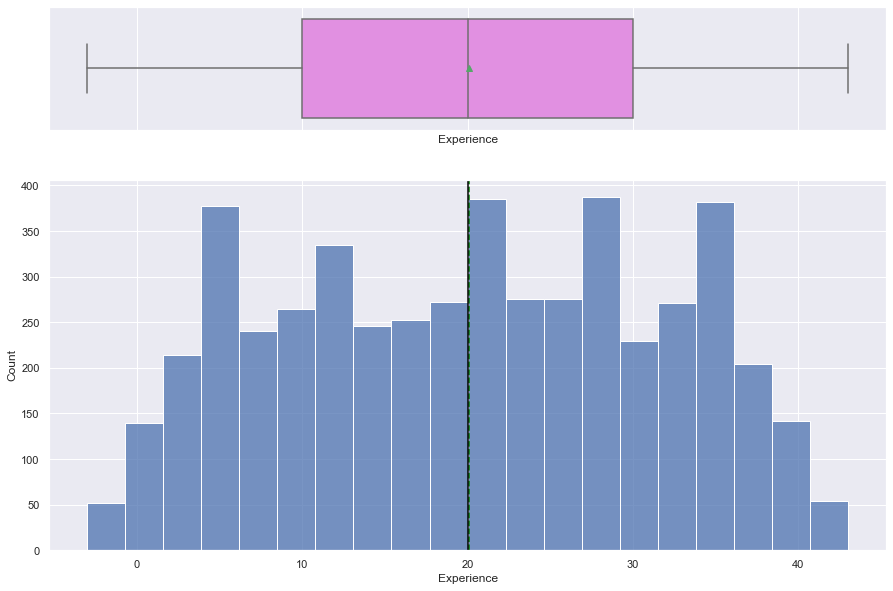

In [19]:
histogram_boxplot(data["Experience"])# Plotting Experience

<font color=darkblue>
<font size =2>
# Observations : 
The customer Experience varies from none to 40 plus years of experience, which is a wide age range.  Can use binning to proper consolidate data


<font color=darkorange>
<font size =4.5>
1.5.2.3 Boxplot and Histogram of Income

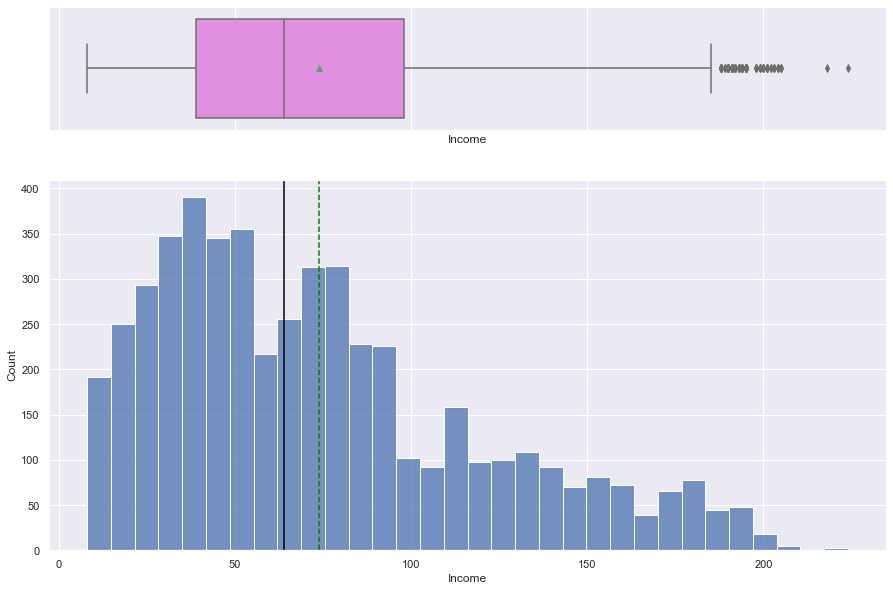

In [20]:
histogram_boxplot(data["Income"])# Plotting Income

<font color=darkblue>
<font size =2>
# Observations : Mostly Right Skewed . Income Range varies from very low income to ver high income customers. Needs Binning and further evaluation. There are a few outliers which need to be handeled. Most customers are in Income level 25k to 100k per Annum. hence a good group to target for marketing.


<font color=darkorange>
<font size =4.5>
1.5.2.4 Boxplot and Histogram of ZIPCode

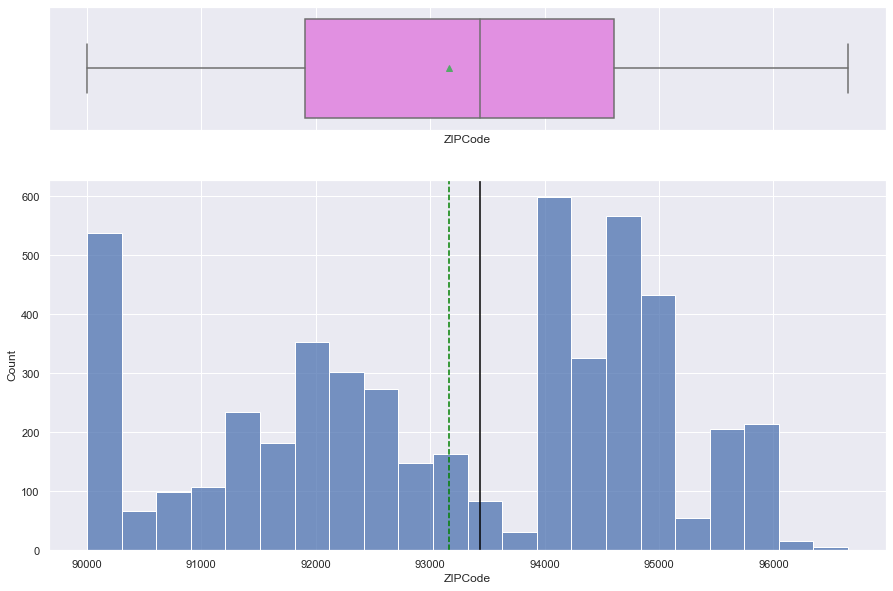

In [21]:
histogram_boxplot(data["ZIPCode"])

<AxesSubplot:>

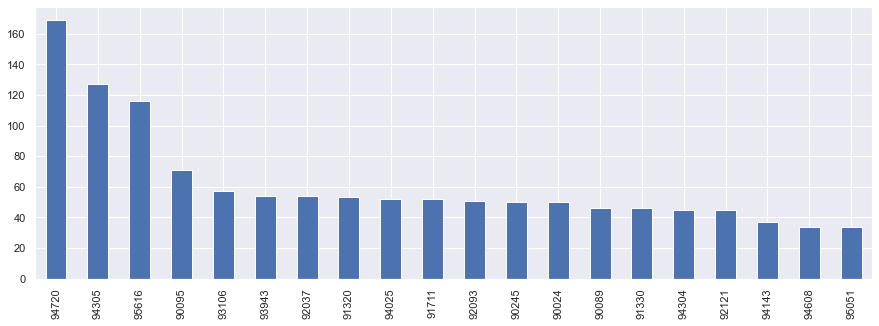

In [24]:
plt.figure(figsize=(15,5 ))
ZIP = loans_bi['ZIPCode'].value_counts()
ZIP.head(20).plot(kind='bar')

<font color=darkblue>
<font size =2>
# Observations : 
As we can see from graph some ZipCodes have higher customer base. marketing can be targeted in these Zipcodes for wide range of customer visibility.
    
Zip Codes 94720,94305,95616 have majority customer base.

<font color=darkorange>
<font size =4.5>
1.5.2.5 Boxplot and Histogram of Average Credit Card Usage per month

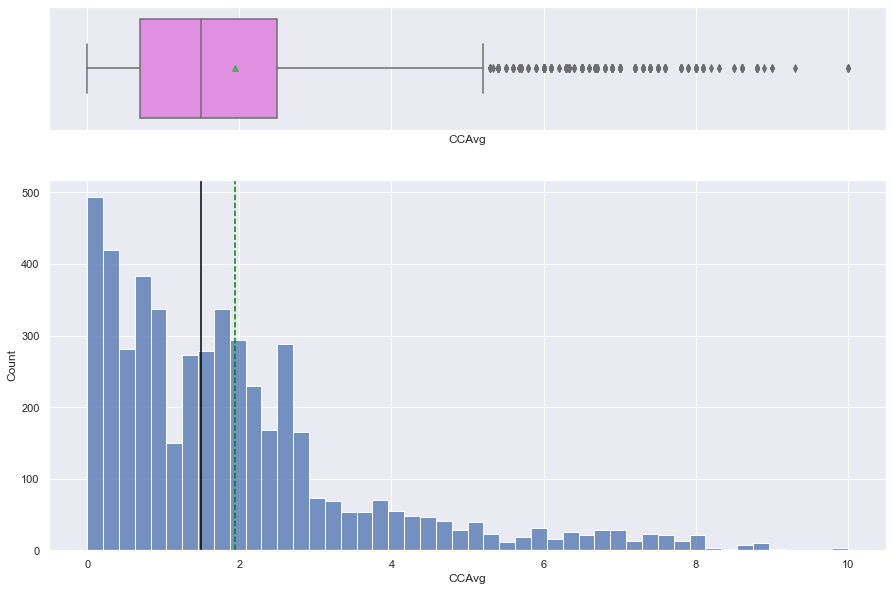

In [25]:
histogram_boxplot(data["CCAvg"])

<font color=darkblue>
<font size =2>
# Observations : Right Skewed data, upper outliers. Needs further evaluation. Maximum customers have a credit card usage of Zero to 3k average per month.


<font color=darkorange>
<font size =4.5>
1.5.2.6 Boxplot and Histogram of Education

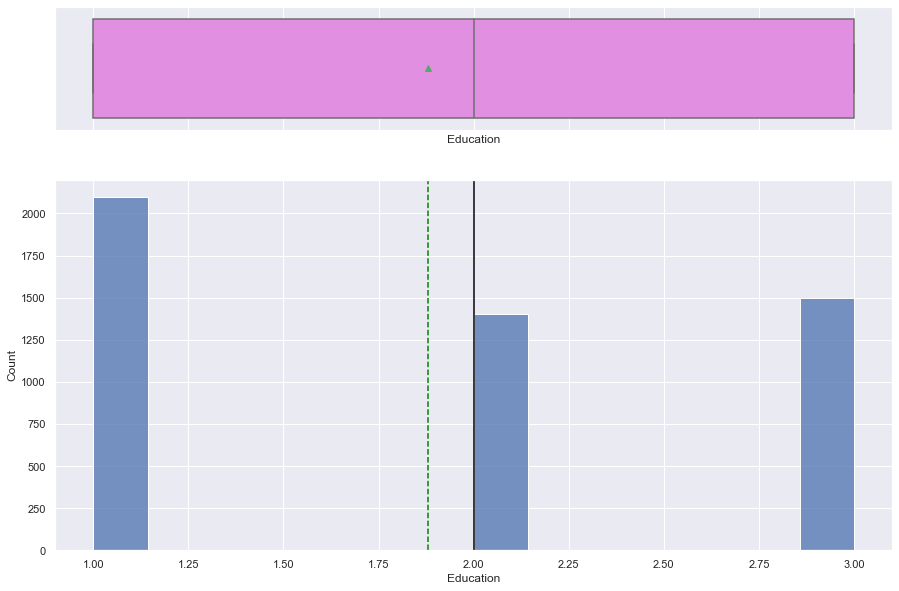

In [26]:
histogram_boxplot(data["Education"])

<font color=darkblue>
<font size =2>
# Observations : 
Most customers have a Under graduate education level

<font color=darkorange>
<font size =4.5>
1.5.2.7 Boxplot and Histogram of House Mortgage

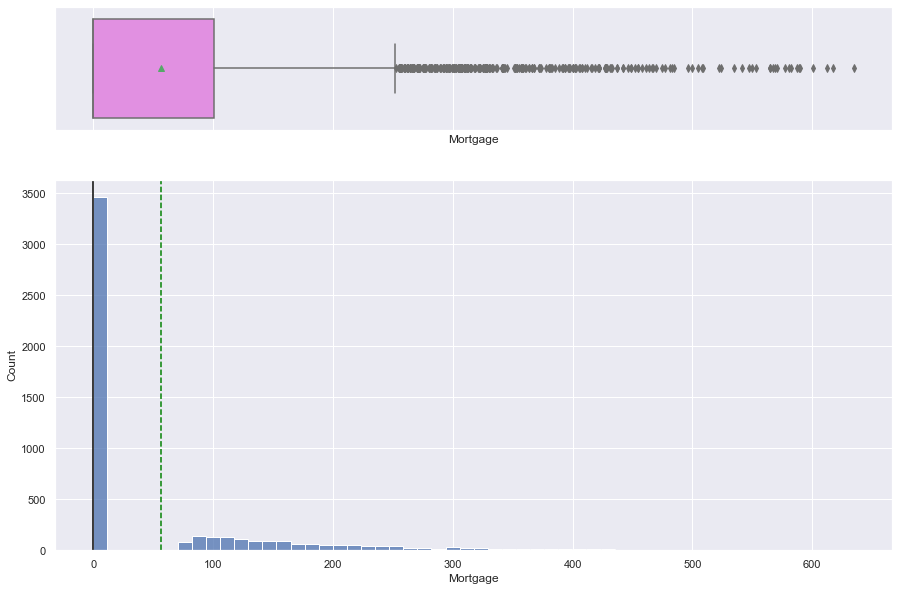

In [27]:
histogram_boxplot(data["Mortgage"])

<font color=darkblue>
<font size =2>
# Observations : 
Needs binning and further evaluation as majority customers have no mortgae loan. Current graph does not show correct correlation.

<font color=darkorange>
<font size =4.5>
1.5.3 Percentage analysis of each category.

In [28]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.5.3.1 Percentage by Education

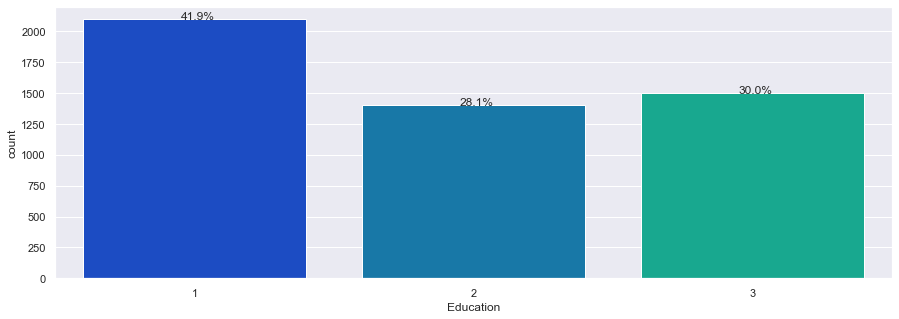

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["Education"],
    palette="winter",
    
)
perc_on_bar(ax, loans["Education"])

<font color=darkorange>
<font size =4.5>
1.5.3.2 Percentage by Family Size

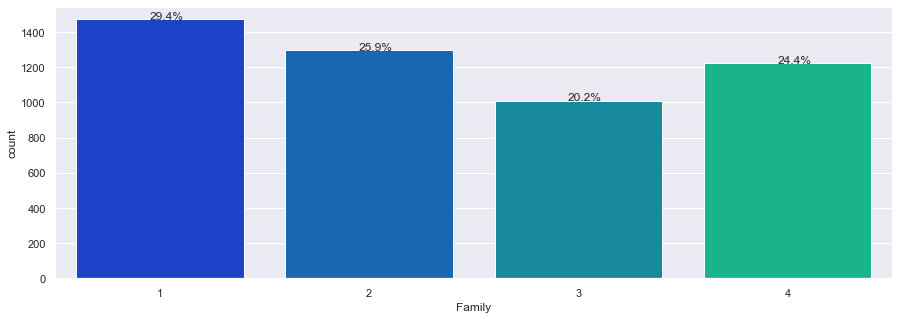

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["Family"],
    palette="winter",
    
)
perc_on_bar(ax, loans["Family"])

<font color=darkorange>
<font size =4.5>
1.5.3.3 Percentage by Securities Account

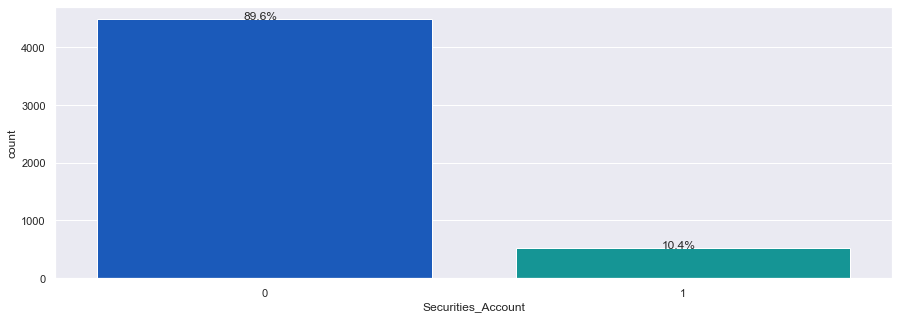

In [31]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["Securities_Account"],
    palette="winter",
    
)
perc_on_bar(ax, loans["Securities_Account"])

<font color=darkorange>
<font size =4.5>
1.5.3.4 Percentage by CD_Account

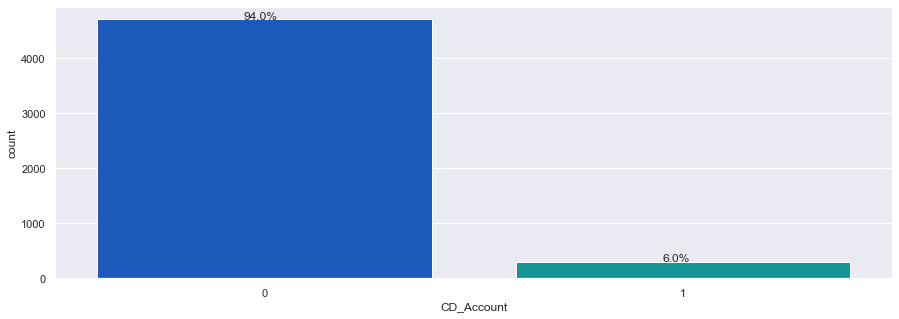

In [32]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["CD_Account"],
    palette="winter",
    
)
perc_on_bar(ax, loans["CD_Account"])

<font color=darkorange>
<font size =4.5>
1.5.3.5 Percentage by Online Banking

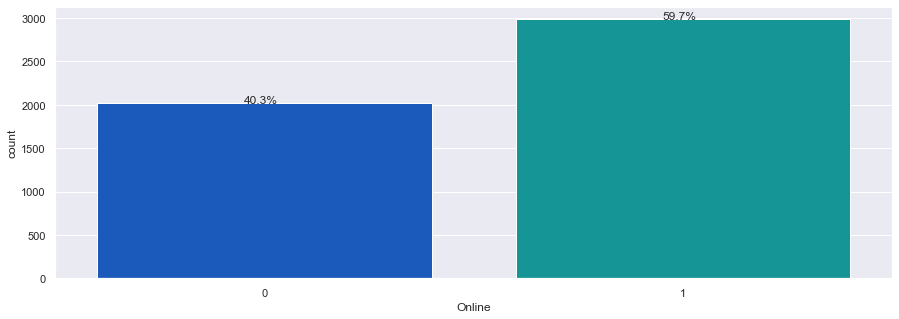

In [33]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["Online"],
    palette="winter",
    
)
perc_on_bar(ax, loans["Online"])

<font color=darkorange>
<font size =4.5>
1.5.3.6 Percentage by Credit Card of other bank

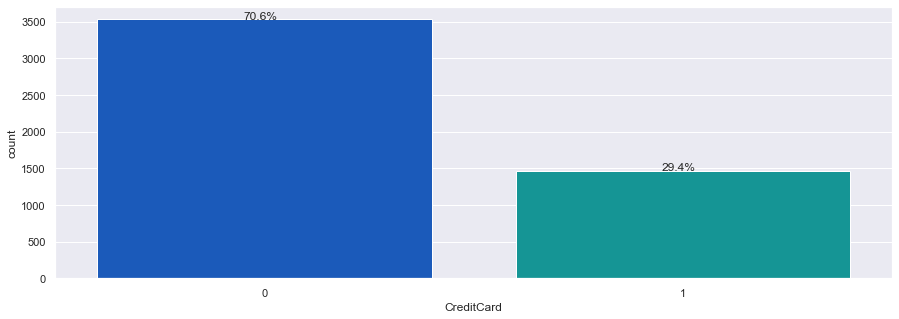

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    loans["CreditCard"],
    palette="winter",
    
)
perc_on_bar(ax, loans["CreditCard"])

<font color=darkcyan>
<font size =5>
1.6 Bivariate Analysis

In [23]:
loans_bi = loans.copy()

<font color=darkorange>
<font size =4.5>
1.6.1 Pair plots of all numerical data

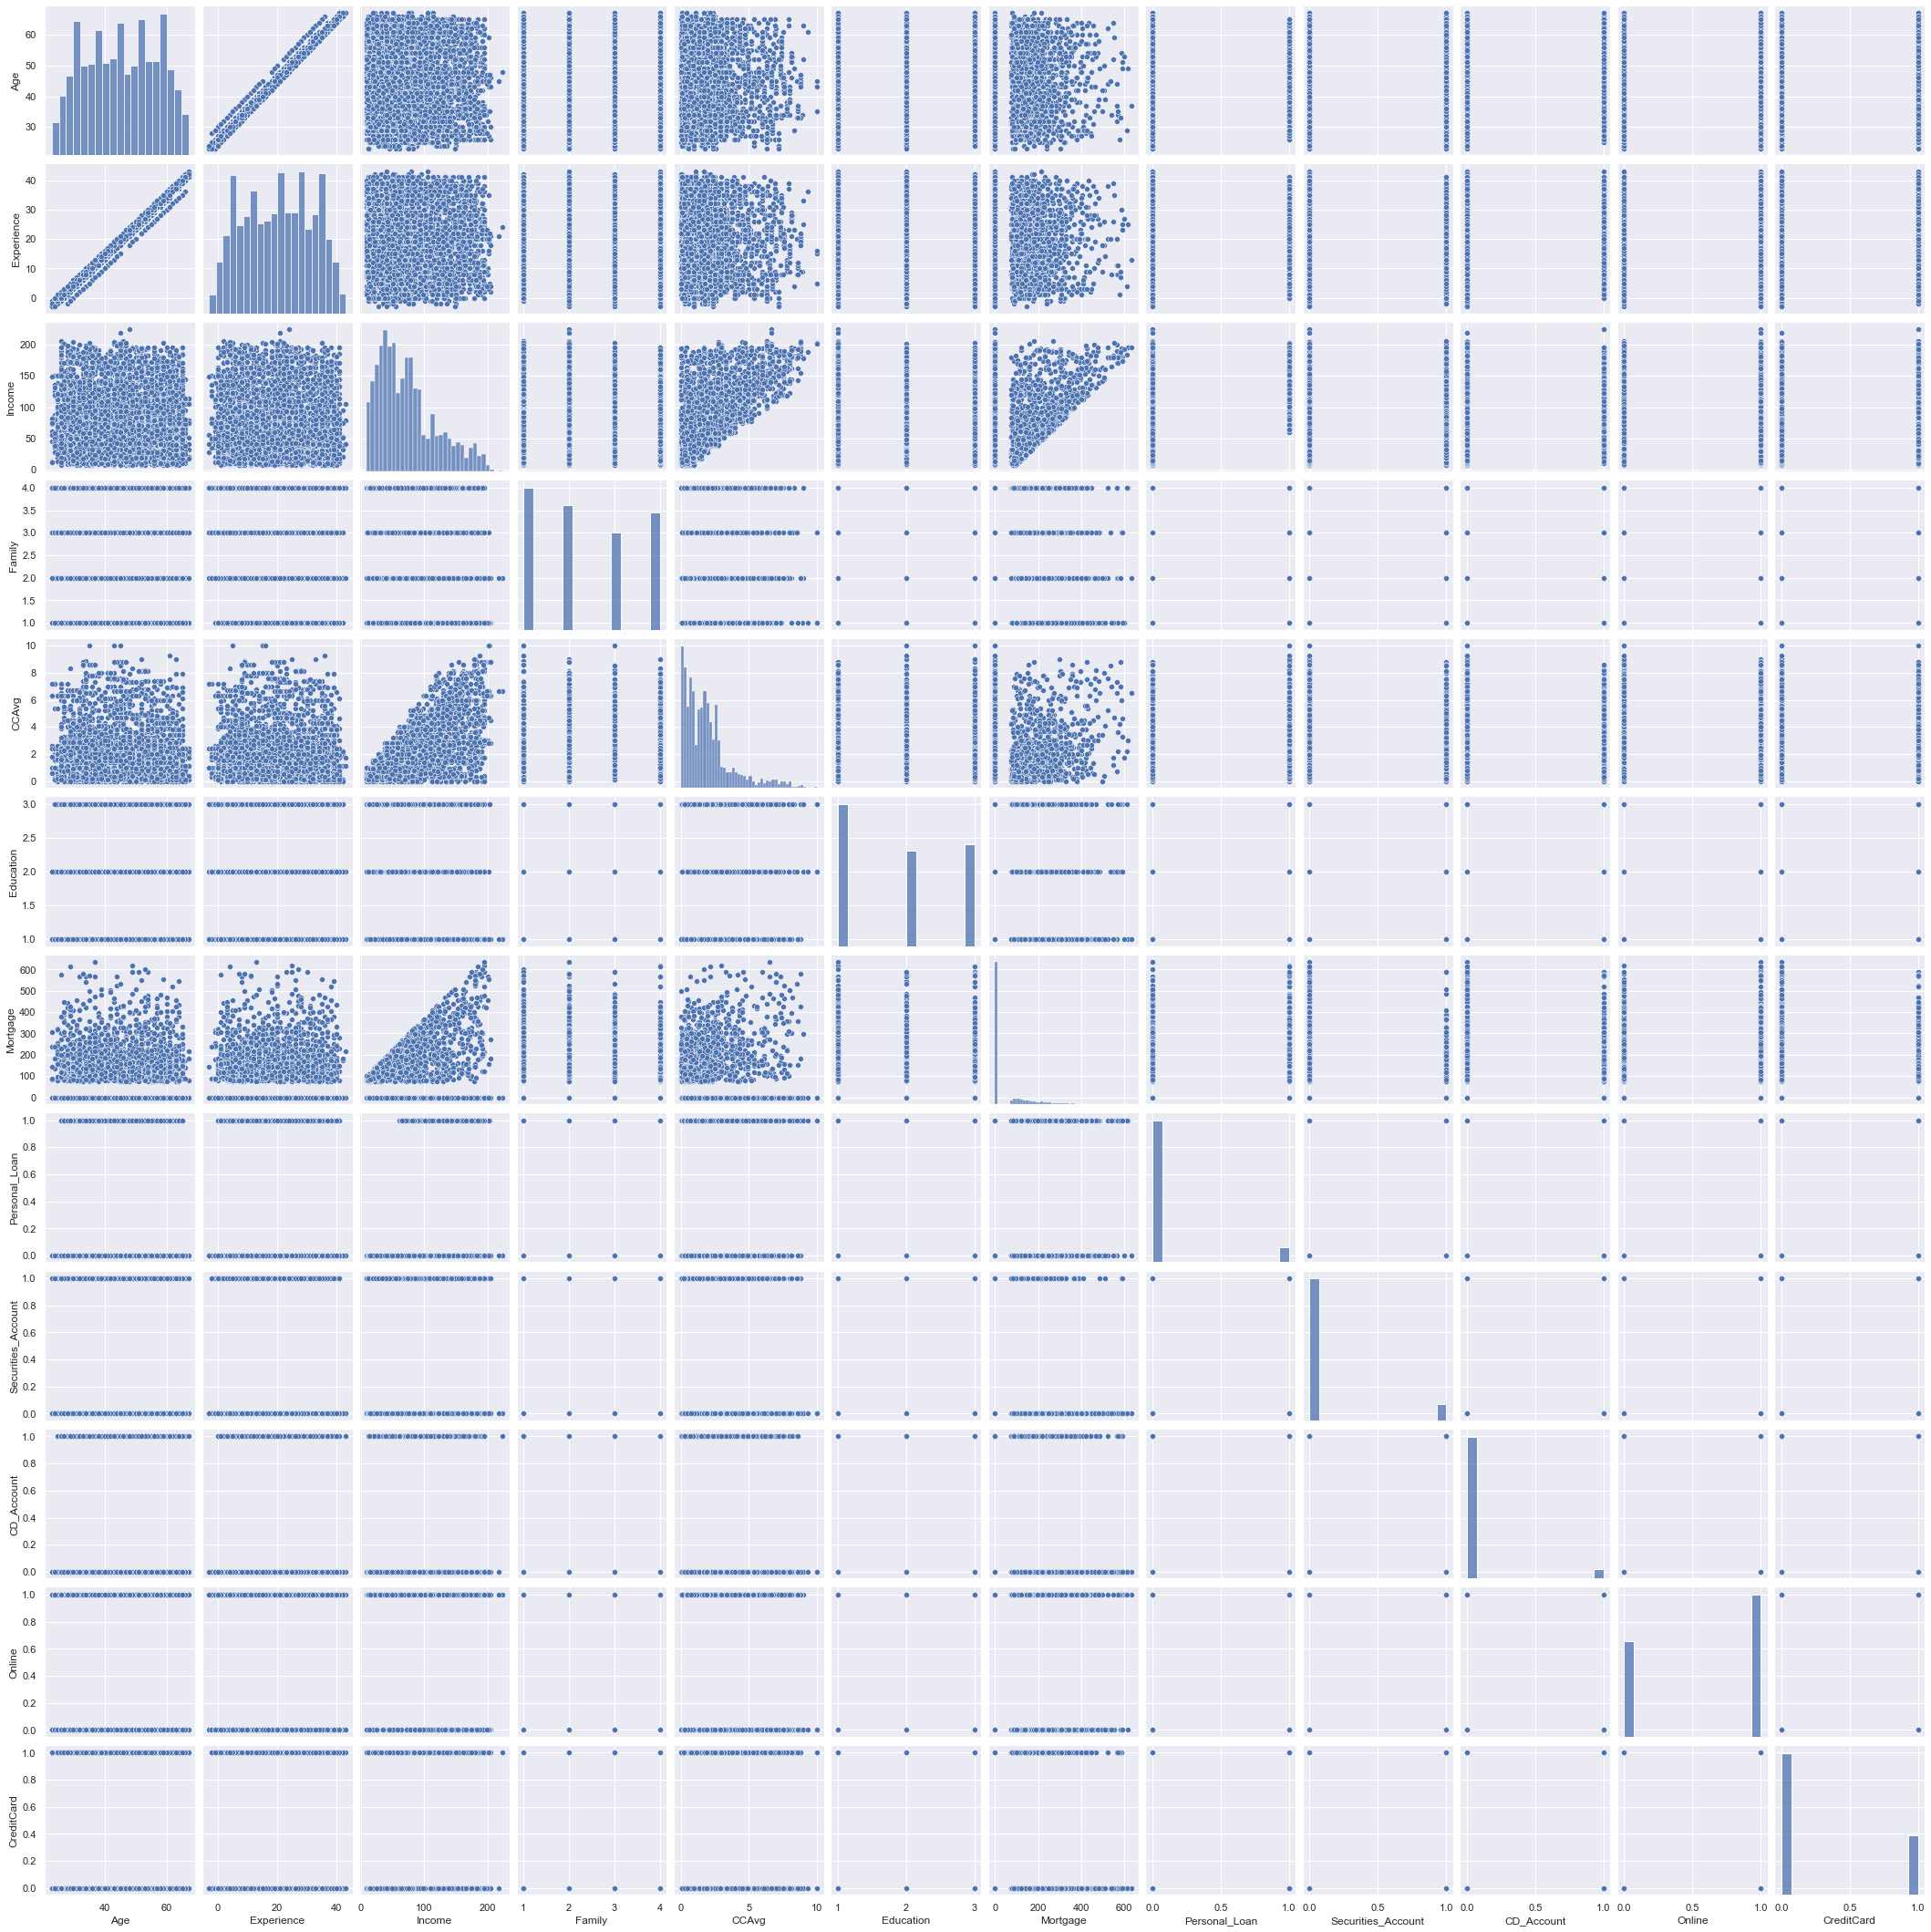

In [35]:
# Plotting pair plots between all numerical columns
sns.pairplot(loans_bi)

<font color=darkorange>
<font size =4.5>
1.6.2 Plotting a heat map

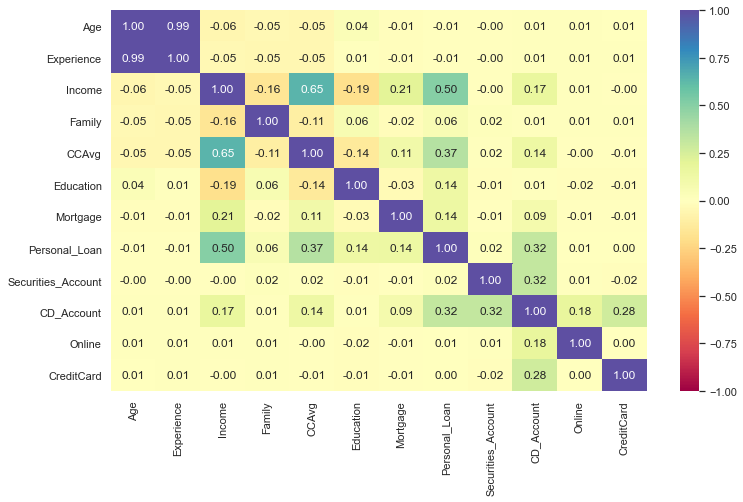

In [36]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    loans_bi.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Income, Average credit card usage, CD_Account has a higher correlation with Personal Loan.
2. Income has a high correlation to average credit card usage.
3. Personal loan has least correlation with Age and Experience.

<font color=darkorange>
<font size =4.5>
1.6.3 Plotting a Bar Plot Correlation between Personal_Loan and all other Dependent paparameters

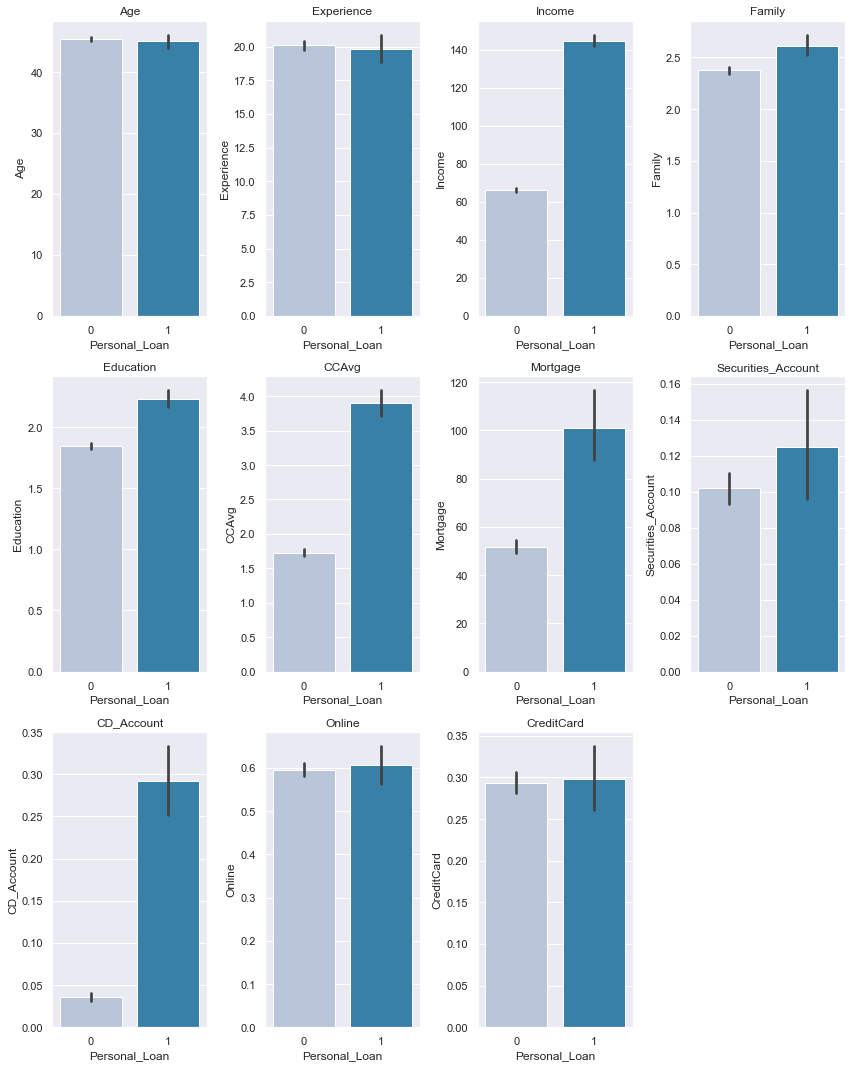

In [37]:
cols = loans_bi[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "Education",
        "CCAvg",
        "Mortgage",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
         ]
].columns.tolist()
plt.figure(figsize=(12,15 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(loans_bi["Personal_Loan"], loans_bi[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Personal loan is not much dependent on Age , Experience or Online Banking of the Customer.
2. Customers with High income have a tendency to take more personal loans.
3. Customers with larger family also  have a higher tendency towards Personal Loan, Probably as a need for higher  emergency expenditures. 
4. More Educated People are taking more Personal Loans
5. Higher the monthly average credit card expenditure of the customer higher the probability of taking personal loans.
6. Higher the House mortgage hihger is the probability of taking personal loans.
7. Customers with Securites and CD Account are more probable to take Personal loans.

<font color=darkorange>
<font size =4.5>
1.6.4 Plotting a Stacked Bar Plot Correlation between Personal_Loan and other Dependent paparameters

In [38]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_bi["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_bi["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<font color=darkorange>
<font size =4.5>
1.6.4.1 Stacked Bar plot on Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


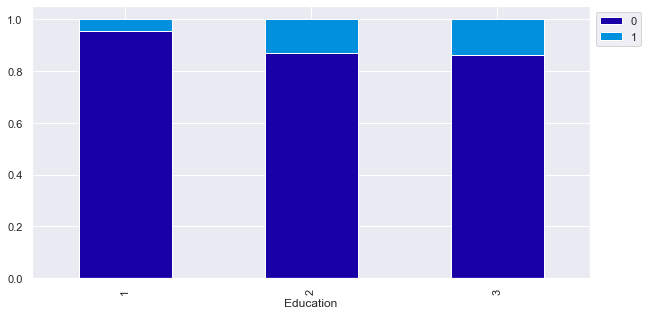

In [39]:
stacked_plot(loans_bi["Education"])

<font color=darkblue>
<font size =2>
# Observations : 
Customers with Education level of Advanced or professional Degree tend to be more inclined to go for personal loans.

<font color=darkorange>
<font size =4.5>
1.6.4.1 Stacked Bar plot on Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


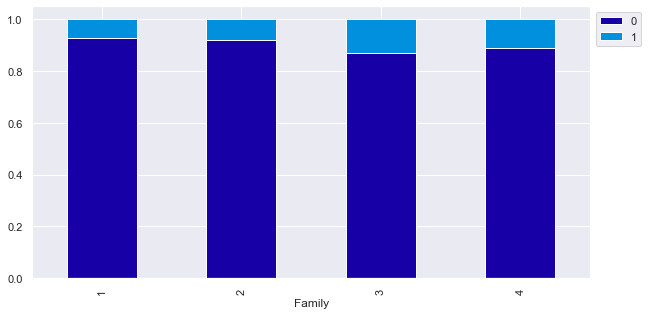

In [40]:
stacked_plot(loans_bi["Family"])

<font color=darkblue>
<font size =2>
# Observations : 
Customers with Family Size of 3 and 4 tend to be more inclined to go for personal loans.

<font color=darkorange>
<font size =4.5>
1.6.4.1 Stacked Bar plot on CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


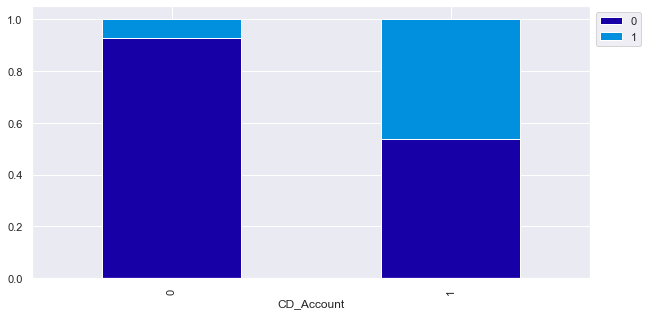

In [41]:
stacked_plot(loans_bi["CD_Account"])

<font color=darkblue>
<font size =2>
# Observations : 
Customers with CD_Account tend to be more inclined to go for personal loans.

<font color=darkorange>
<font size =4.5>
1.6.5 Binning for Analysis

In [42]:
loans_analysis = loans.copy()

<font color=darkorange>
<font size =4.5>
1.6.5.1 Experience binned into categories

In [43]:
# Experience binned for better categorization
binned_exp = pd.cut(loans_analysis['Experience'], [-np.inf,0, 5, 10, 20,30,40, np.inf])
binned_exp

0         (0.0, 5.0]
1       (10.0, 20.0]
2       (10.0, 20.0]
3        (5.0, 10.0]
4        (5.0, 10.0]
            ...     
4995      (0.0, 5.0]
4996      (0.0, 5.0]
4997    (30.0, 40.0]
4998    (30.0, 40.0]
4999      (0.0, 5.0]
Name: Experience, Length: 5000, dtype: category
Categories (7, interval[float64]): [(-inf, 0.0] < (0.0, 5.0] < (5.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, inf]]

In [44]:
binned_exp.value_counts(dropna=False)

(20.0, 30.0]    1301
(10.0, 20.0]    1253
(30.0, 40.0]    1103
(5.0, 10.0]      624
(0.0, 5.0]       547
(-inf, 0.0]      118
(40.0, inf]       54
Name: Experience, dtype: int64

In [45]:
# Assigning labels to categories
loans_analysis['Exp_bin'] = pd.cut(
    loans_analysis['Experience'], [-np.inf,0, 5, 10, 20,30,40, np.inf], 
    labels = ["No Experience", "Less than 5 Years", "5-10 Years", "10-20 Years","20-30 Years","30-40 Years", "More than 40 Years"]
)

loans_analysis['Exp_bin'].value_counts(dropna=False)



20-30 Years           1301
10-20 Years           1253
30-40 Years           1103
5-10 Years             624
Less than 5 Years      547
No Experience          118
More than 40 Years      54
Name: Exp_bin, dtype: int64

In [47]:
loans_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  Exp_bin             5000 non-null   category
dtypes: category(2), float64(1), int64(11)
memory usage: 507.5 KB


<AxesSubplot:xlabel='Exp_bin', ylabel='Personal_Loan'>

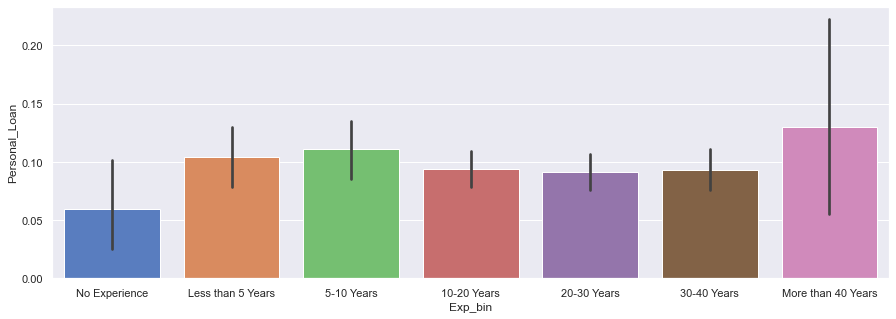

In [48]:
# Plotting binned Experience group with respect to Personal Loans taken.
plt.figure(figsize=(15,5))
sns.barplot(x='Exp_bin', y='Personal_Loan', data= loans_analysis, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. People in the work experience group more than 40 Years tend to take more personal loans
2. Followed by people in work experience group 0-10 years
3. No Work Experience customers are least likely to get personal loans, hence personal loans taken in that category are low.

In [49]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_analysis["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_analysis["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan          0    1   All
Exp_bin                            
No Experience        111    7   118
Less than 5 Years    490   57   547
5-10 Years           555   69   624
10-20 Years         1135  118  1253
20-30 Years         1182  119  1301
30-40 Years         1000  103  1103
More than 40 Years    47    7    54
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


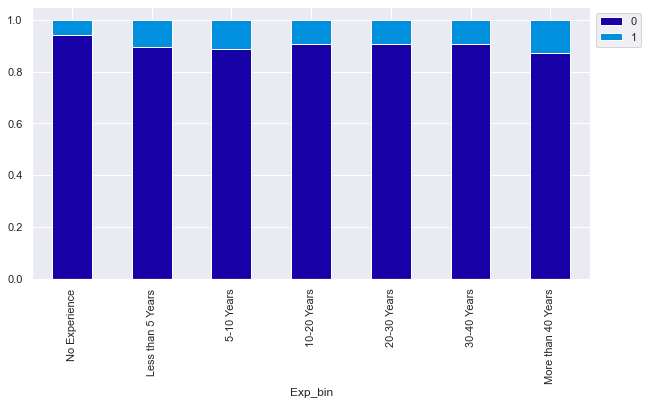

In [50]:
stacked_plot(loans_analysis["Exp_bin"])

<font color=darkorange>
<font size =4.5>
1.6.5.2 Age binned for better categorization

In [ ]:
# Age binned for better categorization
binned_age = pd.cut(loans_analysis['Age'], [-np.inf,30, 40, 50, 60, np.inf])
binned_age

In [ ]:
binned_age.value_counts(dropna=False)

In [ ]:
# Assigning labels to categories
loans_analysis['Age_bin'] = pd.cut(
    loans_analysis['Age'], [-np.inf,30, 40, 50, 60, np.inf], 
    labels = ["Less than 30", "30-40", "40-50", "50-60","60 and above"]
)

loans_analysis['Age_bin'].value_counts(dropna=False)



In [ ]:
# Plotting binned Age group with respect to Personal Loans taken.
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Age_bin', y='Personal_Loan', data= loans_analysis, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Customers in the age group less than 30 and above 60 tend to take more Personal Loans
2. Customers in Age Group 50-60 years are least likely to take Personal Loans.


In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_analysis["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_analysis["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
stacked_plot(loans_analysis["Age_bin"])

<font color=darkorange>
<font size =4.5>
1.6.5.3 Income binned

In [ ]:
# Income binned for better categorization
binned_inc = pd.cut(loans_analysis['Income'], [-np.inf,50,100,150, 200, np.inf])
binned_inc

In [ ]:
binned_inc.value_counts(dropna=False)

In [ ]:
# Assigning labels to categories
loans_analysis['Income_bin'] = pd.cut(
    loans_analysis['Income'], [-np.inf,50, 100, 150, 200, np.inf], 
    labels = ["Low income", "Lower Middle Income", "Middle Income","Upper Middle Income", "High Income"]
)

loans_analysis['Income_bin'].value_counts(dropna=False)



In [ ]:
# Plotting binned Income group with respect to Personal Loans taken.
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Income_bin', y='Personal_Loan', data= loans_analysis, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Upper Middle Income group takes the most Personal Loans, i.e the income group between 150-200K.
2. Low Income Group is least likely to take Personal Loans.


In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_analysis["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_analysis["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
stacked_plot(loans_analysis["Income_bin"])

<font color=darkorange>
<font size =4.5>
1.6.5.4 Average credit Card Usage binned

In [ ]:
# CCAvg binned for better categorization
binned_cc = pd.cut(loans_analysis['CCAvg'], [-np.inf,0,2,4, 6, np.inf])
binned_cc

In [ ]:
binned_cc.value_counts(dropna=False)

In [ ]:
# Assigning labels to categories
loans_analysis['CCAvg_bin'] = pd.cut(
    loans_analysis['CCAvg'], [-np.inf,0,2,4, 6, np.inf], 
    labels = ["No Usage", "0-2K", "2K-4K","4K-6K", "More than 6K"]
)

loans_analysis['CCAvg_bin'].value_counts(dropna=False)



In [ ]:
# Plotting binned CCAvg group with respect to Personal Loans taken.
plt.figure(figsize=(15,5))
ax = sns.barplot(x='CCAvg_bin', y='Personal_Loan', data= loans_analysis, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Customers with lower credit card usage that is less than 2k are least likely to take personal loans.
2. Customers with high Credit card usage are more likely to take Personal loans to pay for debt consolidation, that is more than 4k credit card usage per month.


In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_analysis["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_analysis["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
stacked_plot(loans_analysis["CCAvg_bin"])

<font color=darkorange>
<font size =4.5>
1.6.5.5 Mortgage binned

In [ ]:
# Mortgage binned for better categorization
binned_mortgage = pd.cut(loans_analysis['Mortgage'], [-np.inf,0,100,200,300,400,500, np.inf])
binned_mortgage

In [ ]:
binned_mortgage.value_counts(dropna=False)

In [ ]:
# Assigning labels to categories
loans_analysis['Mortgage_bin'] = pd.cut(
    loans_analysis['Mortgage'], [-np.inf,0,100,200,300,400,500, np.inf], 
    labels = ["No Mortgage Loan", "0-100K", "100K-200K","200K-300K","300K-400K","400k-500K", "More than 500K"]
)

loans_analysis['Mortgage_bin'].value_counts(dropna=False)



In [ ]:
# Plotting binned CCAvg group with respect to Personal Loans taken.
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Mortgage_bin', y='Personal_Loan', data= loans_analysis, palette='muted') 


<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Customers with no mortgage loan or low mortgage loans are least likely to go for Personal Loans.
2. Customers with more than 500k personal loans are more likely to go for Personal Loans.

In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, loans_analysis["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, loans_analysis["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
stacked_plot(loans_analysis["Mortgage_bin"])

In [ ]:
loans.corr() # It will show correlation matrix 

<font color=darkcyan>
<font size =5>
1.7 Data Preprocessing for Logistic Regression

In [ ]:
loans1 = loans.copy()

In [ ]:
# Drop Zip Code column for outlier 
loans1.drop(["ZIPCode"], axis=1, inplace=True)


<font color=darkorange>
<font size =4.5>
1.7.1 Outlier detection using box plot

In [ ]:
numerical_col = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage"]
#numerical_col = loans1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

 Income , CCAvg and Mortgage have upper outliers.


<font color=darkorange>
<font size =4.5>
1.7.2 Treating outliers

In [ ]:
loans_out = loans1.copy()

In [ ]:
def treat_outliers(loans_out,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=loans_out[col].quantile(0.25) # 25th quantile
    Q3=loans_out[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    loans_out[col] = np.clip(loans_out[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return loans_out

def treat_outliers_all(loans_out, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        loans_out = treat_outliers(loans_out,c)
        
    return loans_out

In [ ]:
numerical_col = loans_out.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

# treating outliers
numerical_col = [ele for ele in numerical_col] 
loans_out= treat_outliers_all(loans_out,numerical_col)

In [ ]:
numerical_col = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage"]
#numerical_col = loans1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(loans_out[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

 No more outliers


<font color=darkorange>
<font size =4.5>
1.7.3 Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X = loans1.drop('Personal_Loan',axis=1)     # All columns except Target variable
Y = loans1['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

<font color=darkorange>
<font size =4.5>
1.7.4 Check the split of data

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loans1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loans1.index)) * 100))

<font color=darkorange>
<font size =4.5>
1.7.5 Check Personal Loan True/False ratio in split data 

In [ ]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loans1.loc[loans1['Personal_Loan'] == 1]), (len(loans1.loc[loans1['Personal_Loan'] == 1])/len(loans1.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loans1.loc[loans1['Personal_Loan'] == 0]), (len(loans1.loc[loans1['Personal_Loan'] == 0])/len(loans1.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

<font color=darkorange>
<font size =4.5>
1.7.6 Check Percentage of Split Data

In [ ]:
print('Shape of Training set : ',x_train.shape )
print('Shape of test set : ',x_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

<font color=darkcyan>
<font size =5>
1.8 Model Building for Logistic Regression

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take a Personal loan when he didnot.
2. Predicting a customer will not take a loan when he has.
### Which case is more important? 

1. If we predict a customer will take a loan when he hasn't then bank wastes the marketing on that customer.
2. If we predict a customer will not take a loan and he does then bank losses on business.
Second case is more important as in second case bank losses on valuable business as compared to first where just some extra money goes into marketing. Hence in this case False positives are more loss in business than false negatives

### How to reduce this loss i.e need to reduce False Positives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

<font color=darkorange>
<font size =4.5>
1.8.1 Functions for model Performance metrics

In [ ]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ['Predicted 1','Predicted 0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<font color=darkorange>
<font size =4.5>
1.8.1 Build a model (Basic Logistic Regression)

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
lg = LogisticRegression(solver="liblinear")
model  = lg.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

<font color=darkorange>
<font size =4.5>
1.8.2 Model Statistics


Model Accuracy Score is 94% which is a good value. Need further evaluation of Precision and Recall for efficient model.

<font color=darkorange>
<font size =4.5>
1.8.3 Finding the coefficients

In [ ]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, x_train.columns, columns=['coef']).T

<font color=darkorange>
<font size =4.5>
1.8.4 Coefficient interpretations



* Coefficient of Age, Securities Account, Online, Credit Card are negative, increase in these will lead to decrease in chances of a customer taking a Personal Loan
* Coefficient of Experience, Income, Family, CCAvg, Education,Mortgage and Cd_Account are positive increase in these will lead to increase in chances of a customer taking Personal Loan

<font color=darkorange>
<font size =4.5>
1.8.5 Converting the coefficients to odds

**Odds from coefficients**

In [ ]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, x_train.columns, columns=['odds']).T # adding the odds to a dataframe

**Percentage change in odds**

In [ ]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, x_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

<font color=darkorange>
<font size =4.5>
1.8.6 Coefficient interpretations



* `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person taking a loan by 33% or 0.66 times.
* `Experience`: Holding all other features constant a 1 unit change in the experience will increase the odds of a customer  taking a loan by 50%. 
* `Income`: Holding all other features constant a 1 unit change in the Income will increase the odds of a customer   taking a loan by 50%.
* `Family`: Holding all other features constant a 1 unit change in the Family Size will increase the odds of a customer   taking a loan by 91%.
* `CCAvg`: Holding all other features constant a 1 unit change in the CCAvg will increase the odds of a customer   taking a loan by 17%.
* `Education`: Holding all other features constant a 1 unit change in the Education will increase the odds of a customer   taking a loan by 5.2 times.
* The odds of a person having Securities Account decreases the chances of taking a personal loan by 59%.
* The odds of a person having CD Account increases the chances of taking a personal loan by 26 times.
`Interpretation for other attributes can be done similarly.`

<font color=darkcyan>
<font size =5>
1.9 Model Performance Evaluation and Improvement for Logistic Regression

<font color=darkorange>
<font size =4.5>
1.9.1  Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take a Personal loan when he didnot.
2. Predicting a customer will not take a loan when he has.

### Which case is more important? 

1. If we predict a customer will take a loan when he hasn't then bank wastes the marketing on that customer.
2. If we predict a customer will not take a loan and he does then bank losses on business.

Second case is more important as in second case bank losses on valuable business as compared to first where just some extra money goes into marketing. Hence in this case False Negative are more loss in business than false negatives

### How to reduce this loss i.e need to reduce False Negative?
*  `Recall` should be maximized, the lesser the value of false Negative higher the chances of business for customer.
*  But the value of Recall should be increased but without reducing precision. Both Recall and Precision are important for a good predictive model. Hence we need to find a balance between the two i.e a good `f1 score` along with `Recall`


<font color=darkorange>
<font size =4.5>
1.9.2 Functions for model Performance metrics

In [ ]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

<font color=darkorange>
<font size =4.5>
1.9.3 Functions for making Confusion Matrix

In [ ]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ['Predicted 1','Predicted 0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<font color=darkorange>
<font size =4.5>
1.9.4 Model Performance for Basic Logistic Regression Model

In [ ]:
# checking model performances for this model
scores_LR = get_metrics_score(model,x_train,x_test,y_train,y_test)

<font color=darkorange>
<font size =4.5>
1.9.5 Confusion matrix for Basic Logistic Regression Model

In [ ]:
# creating confusion matrix
make_confusion_matrix(lg,x_test,y_test)

<font color=darkorange>
<font size =4.5>
1.9.6 ROC-AUC

<font color=darkorange>
<font size =4.5>
1.9.6.1 ROC-AUC on training set

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<font color=darkorange>
<font size =4.5>
1.9.6.2 ROC-AUC on test set

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<font color=darkorange>
<font size =4.5>
1.9.7 Model Performance Evaluation for Basic Logisitc Regression Model

* Logistic Regression model is giving a good performance on training and test set but the recall is low.
* `Accuracy`: Model has very high Accuracy on both train and test data of 95% and 94% respectively.
* `Recall`: Model has comparitively low  Recall on both train and test data of 62% and 57% respectively. 
* `Precision`: Model has  a good Precision on both train and test data of 82%.
* `f1 score`: Model has comparitively low f1 score on both train and test data of 71% and 67% respectively.
* We need to improve the `Recall` and`f1 score`of the model to improve its performance.


<font color=darkorange>
<font size =4.5>
1.9.8 Model Performance Improvement using AUC-ROC Curve

* Check if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(x_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

In [ ]:
scores_LR = get_metrics_score(lg,x_train,x_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

<font color=darkorange>
<font size =4.5>
1.9.9 Model Performance Evaluation for AUC-ROC Curve threshold

* The recall of the model has improved but the Precision has reduced on training and test set.
* `Accuracy`: Model has very high Accuracy on both train and test data of 85% and 86% respectively.
* `Recall`: Model has comparitively high  Recall on both train and test data of 92% and 91% respectively. 
* `Precision`: Model has  a low Precision on both train and test data of 55% and 57 % respectively.
* `f1 score`: Model has comparitively high f1 score on both train and test data of 88% .
* We need to improve the `Precision` and find a balance between `Recall`and `Precision` for a good predictive model


<font color=darkorange>
<font size =4.5>
1.9.10 Model Performance Improvement using Precision-Recall Curve

#### Check  Precision-Recall curve and see if we can find a better threshold

In [ ]:
y_scores=lg.predict_proba(x_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.32, we get balanced recall and precision.

In [ ]:
optimal_threshold_curve = 0.3

scores_LR = get_metrics_score(lg,x_train,x_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

<font color=darkorange>
<font size =4.5>
1.9.11 Model Performance Evaluation for  Precision-Recall Curve threshold

* Model is performing well on training and test set.
* There's a reduction in `Recall` but a bsignificant improvement in `Precision` 
* `Accuracy`: Model has very high Accuracy on both train and test data of 94% and 93% respectively.
* `Recall`: Model has comparitively high  Recall on both train and test data of 75% and 67% respectively. 
* `Precision`: Model has  a low Precision on both train and test data of 68% and 72 % respectively.
* `f1 score`: Model has comparitively high f1 score on both train and test data of 85% .



<font color=darkorange>
<font size =4.5>
1.9.11 Model Performance Summary

In [ ]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,x_train,x_test,y_train,y_test,flag=False)
    k = get_metrics_score(model,x_train,x_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,x_train,x_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    #intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    #optimal threshold = 0.77  
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    #optimal threshold = 0.58
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression(AUC-ROC curve)-0.06 Threshold',
                                          'Logistic Regression(Precision-Recall Curve)-0.3 Threshold'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 



comparison_frame

<font color=darkcyan>
<font size =5>
1.10  Decision Tree Model

In [ ]:
loans2 = loans.copy()

In [ ]:
loans2.drop(["ZIPCode"], axis=1, inplace=True)


<font color=darkorange>
<font size =4.5>
1.10.1 Split Data

In [ ]:
X = loans2.drop("Personal_Loan" , axis=1)
y = loans2.pop("Personal_Loan")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

<font color=darkorange>
<font size =4.5>
1.10.2 Build a Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.  

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

<font color=darkorange>
<font size =4.5>
1.10.3  Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take a Personal loan when he didnot.
2. Predicting a customer will not take a loan when he has.

### Which case is more important? 

1. If we predict a customer will take a loan when he hasn't then bank wastes the marketing on that customer.
2. If we predict a customer will not take a loan and he does then bank losses on business.

Second case is more important as in second case bank losses on valuable business as compared to first where just some extra money goes into marketing. 

### How to reduce this loss i.e need to reduce False Negative?
*  `Recall` should be maximized, the lesser the value of false Negative higher the chances of business for customer.


In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

<font color=darkblue>
<font size =2>
# Observations : 
The ratio of positives to negatives is 3:7, so if our model marks each sample as negative, then also we'll get 70% accuracy, hence accuracy is not a good metric to evaluate here.

In [ ]:
#Checking number of positives
y.sum(axis = 0)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual -1","Actual - 0"]],
                  columns = [i for i in ['Predicted - 1','Predicted - 0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

<font color=darkorange>
<font size =4.5>
1.10.4  Confusion Matrix for Initial Decision tree Model

In [ ]:
make_confusion_matrix(dTree,y_test)

In [ ]:
# Recall on train and test
get_recall_score(dTree)

<font color=darkorange>
<font size =4.5>
1.10.5 Visualizing the Decision Tree

In [ ]:
feature_names = list(X.columns)
print(feature_names)

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

<font color=darkorange>
<font size =4.5>
1.10.6 Identifying Key Variables

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color=darkblue>
<font size =2>
# Observations : 
According to this decision tree model, Education,Income and Family  are the most important variable for predicting the personal loan.

<font color=darkcyan>
<font size =5>
1.11 Model Performance Evaluation and Improvement for Decision Tree 

<font color=darkorange>
<font size =4.5>
1.11.1  Model evaluation criterion

* The tree above is very complex, such a tree often overfits.
* `Recall` is 100% in training data which shows an overfitting model. 
* We need to reduce overfitting of the model by Pre-pruning and Post -Pruning Techniques to find the best fit model.



<font color=darkorange>
<font size =4.5>
1.11.2  Reducing Overfitting by limiting max_depth


* Check by Limiting the max_depth of tree to 3

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

<font color=darkorange>
<font size =4.5>
1.11.2.1  Confusion Matrix - decision tree with depth restricted to 3

In [ ]:
make_confusion_matrix(dTree1, y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

* Recall on training set has reduced from 1 to 0.81 but this is an improvement because now the model is not overfitting and we have a generalized model.

<font color=darkorange>
<font size =4.5>
1.11.2.2  Visualizing the tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

<font color=darkblue>
<font size =2>
# Observations :
    The tree has become readable now but the recall on test set has decreased.

<font color=darkorange>
<font size =4.5>
1.11.2.3  Key Variables

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color=darkorange>
<font size =4.5>
1.11.3  Reducing Overfitting by Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

<font color=darkorange>
<font size =4.5>
1.11.3.1  Confusion Matrix - decision tree with tuned hyperparameters

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

* Recall has improved for both train and test set after hyperparameter tuning.

<font color=darkorange>
<font size =4.5>
1.11.3.2  Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color=darkorange>
<font size =4.5>
1.11.4  Reducing Overfitting by Cost Complexity Pruning (Post Pruning)

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.


<font color=darkorange>
<font size =4.5>
1.11.4.1  Total impurity of leaves vs effective alphas of pruned tree

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

<font color=darkorange>
<font size =4.5>
1.11.4.2  Accuracy vs alpha for training and testing sets

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

#### Since accuracy isn't the right metric for our data we would want high recall

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

<font color=darkorange>
<font size =4.5>
1.11.4.3   Confusion Matrix - post-pruned decision tree

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model)

* With post-pruning we get the highest recall on both training and test set

<font color=darkorange>
<font size =4.5>
1.11.4.4   Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Checking balance and Duration of loan are the most important features.

<font color=darkcyan>
<font size =5>
1.12  Comparing all the Decision Tree Models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.81,0.92,0.96], 'Test_Recall':[0.88,0.75,0.87,0.90]}) 
comparison_frame

<font color=darkblue>
<font size =2>
# Observations : Decision tree with post-pruning is giving the highest recall on test set.

<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
Observations

1. The customer Age varies from 25 to 65 a wide age range. Maximum customers are in age range of 35 to 60. 
2. We have significant customers with no mortgage loan.
3. Majority customers donot have Securities or CD Account.
4. Majority customers are using online banking.
5. Majority customers donot have other bank Credit Cards.
6. The customer Experience varies from none to 40 plus years of experience, which is a wide age range. 
7. Income Range  of  customer varies from very low income to very high income customers. Most customers are in Income level 25k to 100k Annual Income, hence a good group to target for marketing.
8. Some ZipCodes have higher customer base. Marketing can be targeted in these Zipcodes for wide range of customer visibility. Zip Codes 94720,94305,95616 have majority customer base.
9. Maximum customers have a credit card usage of Zero to 3k average per month.
10. Most customers have a Under graduate education level.

    
Key Variables correlating 

1. Income, Average credit card usage, CD_Account has a higher correlation with Personal Loan.
2. Income has a high correlation to average credit card usage.
3. Personal loan is not much dependent on Age , Experience or Online Banking of the Customer.
4. Customers with High income have a tendency to take more personal loans.
5. Customers with larger family also  have a higher tendency towards Personal Loan, Probably as a need for higher  emergency expenditures. Customers with Family Size of 3 and 4 tend to be more inclined to go for personal loans.
6. More Educated People are taking more Personal Loans.Customers with Education level of Advanced or professional Degree tend to be more inclined to go for personal loans.
7. Higher the monthly average credit card expenditure of the customer higher the probability of taking personal loans.
8. Higher the House mortgage hihger is the probability of taking personal loans.
9. Customers with Securites and CD Account are more probable to take Personal loans.
10. Customers with work experience more than 40 Years tend to take more personal loans.Followed by people in work experience group 0-10 years. No Work Experience customers are least likely to get personal loans, hence personal loans taken in that category are low.
11. Customers in the age group less than 30 and above 60 tend to take more Personal Loans.Customers in Age Group 50-60 years are least likely to take Personal Loans.
12. Upper Middle Income group takes the most Personal Loans, i.e the income group between 150-200K. Low Income Group is least likely to take Personal Loans.
13. Customers with lower credit card usage that is less than 2k are least likely to take personal loans. Customers with high Credit card usage are more likely to take Personal loans to pay for debt consolidation, that is more than 4k credit card usage per month.
14. Customers with no mortgage loan or low mortgage loans are least likely to go for Personal Loans. Customers with more than 500k personal loans are more likely to go for Personal Loans.  

### <a id='link1'>Insights and Recommendations to marketing team</a>

<font color = 'black'>



1) Customers with annual income in the range 150-200k are most likely to take personal loans.

2) Low Income group i.e less than 50k annual income are least likely to take personal loans
    
3) Customers with large family like 3 or 4 members are more likely to opt for Personal Loans. Mostly because large families might trigger large unexpected expenditures like Emergency Medical or other expense, Vacation costs or Home Remodelling or moving Cost or Some appliance purchase, etc.

4) Customers with Education of Advanced or professional Degree tend to be more inclined to go for personal loans.Hence they would be our target market customers. 
    
5)  Customers with high Credit card usage are more likely to take Personal loansas compared to others to pay for debt consolidation.Hence our target customer market is those with credit card usage of more than 4k per month.

6) Customers with higher House Mortgage loans tend to take more personal loans.

7) Customers with Securites and CD Account are more probable to take Personal loans.

8) Marketing can be targeted in Zipcodes with large customer base  for wide range of customer visibility. Hence marketing should be more concentrated in Zip Codes 94720,94305,95616.
     
  

### <a id='link1'>Comparission between Decision Tree Model and Logistic Regression Model </a>

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Best fit Logistic Regression Model','Best fit Decision Tree Model'], 'Train_Recall_Percentage':[75, 96], 'Test_Recall_Percentage':[67,90],'Train_Accuracy_Percentage':[94.6,99.28],'Test_Accuracy_Percentage':[93.66,98.4]}) 
comparison_frame

<font color = 'black'>
Observations
    
As we can see from above table the Recall parameter is highest in Best fit decision tree Model as compared to the Logistic Regression model. Accuracy also is higher in Decision tree Model .

Hence we can effectively say that Decision tree model is better in comparision.

<font color=darkcyan>
<font size =5>
1.14 EDA on incorrectly predicted data

<font color=darkorange>
<font size =4.5>
1.14.1 Find incorrectly predicted data samples for Decission Tree Model

In [ ]:
# The incorrectly Predicted data for Best fit Decision Tree Algorithm 
y_test = np.asarray(y_test)
misclassified = np.where(y_test != clf.predict(X_test))
misclassified

<font color=darkorange>
<font size =4.5>
1.14.2 Make a new data set of the misclassified samples for Decision tree Model

In [ ]:
# Making a new dataset with misclassified samples of Decision Tree Model
df1 = loans.loc[[34,   48,   51,   94,  102,  106,  174,  238,  284,  361,  376,
         380,  401,  402,  414,  419,  451,  468,  476,  505,  507,  509,
         514,  521,  556,  569,  577,  587,  601,  638,  641,  657,  682,
         726,  741,  766,  775,  884,  915,  990, 1062, 1108, 1113, 1128,
        1131, 1176, 1182, 1189, 1208, 1282, 1284, 1337, 1342, 1343, 1390,
        1434, 1454], :]
df1

<font color=darkorange>
<font size =4.5>
1.14.3 Perform EDA for misclassified samples in Decision Tree model

In [ ]:
#Performing EDA on the misclassified sample data set
# Plotting a histogram of all numerical columns in the dataset
columns = list(df1)[0:13]# All columns in the data set
df1[columns].hist(stacked=False, bins=100, figsize=(12,36), layout=(14,2)); # plot histogram

In [ ]:
#Bar Plot with respect to personal Loan
columns = list(df1)[0:13]
for i in columns:
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x= i, y='Personal_Loan', data= df1, palette='muted') 

In [ ]:
# Correlation between personal loan and other independent variables
cols = df1[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "Education",
        "CCAvg",
        "Mortgage",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
         ]
].columns.tolist()
plt.figure(figsize=(12,15 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(df1["Personal_Loan"], df1[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Most False Positives occured in samples with high Income, CCAvg and Large family Size.
2. Most False Negatives occured in Age , Experience,Mortgage,Education, Securities Account,Online banking and Credit card

<font color=darkorange>
<font size =4.5>
1.14.4 Find incorrectly predicted data samples for logistic regression model

In [ ]:
# The incorrectly Predicted data for Best Fit Logistic Regression Model
y_test = np.asarray(y_test)
misclassified = np.where(y_test != lg.predict(X_test))
misclassified

<font color=darkorange>
<font size =4.5>
1.14.5 Make a new data set of the misclassified samples for Logistic regression Model

In [ ]:
# Making a new dataset with misclassified samples of Logistic Regression Model
df2 = loans.loc[[40,   42,   51,   94,  102,  106,  138,  174,  215,  226,  238,
         250,  284,  324,  376,  378,  380,  401,  402,  414,  451,  468,
         476,  505,  507,  509,  514,  525,  533,  549,  556,  569,  577,
         601,  612,  621,  626,  636,  638,  651,  657,  682,  700,  726,
         741,  750,  766,  768,  775,  785,  836,  848,  906,  908,  913,
         993, 1038, 1060, 1091, 1108, 1128, 1131, 1134, 1176, 1179, 1182,
        1183, 1189, 1232, 1264, 1269, 1282, 1284, 1337, 1342, 1343, 1355,
        1390, 1427, 1434, 1454, 1481], :]
df2

<font color=darkorange>
<font size =4.5>
1.14.5 Perform EDA for the misclassified samples of Logistic regression Model

In [ ]:
#Performing EDA on the misclassified sample data set
# Plotting a histogram of all numerical columns in the dataset
columns = list(df2)[0:13]# All columns in the data set
df2[columns].hist(stacked=False, bins=100, figsize=(12,36), layout=(14,2)); # plot histogram

In [ ]:
columns = list(df2)[0:13]
for i in columns:
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x= i, y='Personal_Loan', data= df2, palette='muted') 

In [ ]:
cols = df2[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "Education",
        "CCAvg",
        "Mortgage",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
         ]
].columns.tolist()
plt.figure(figsize=(12,15 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(df2["Personal_Loan"], df2[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=darkblue>
<font size =2>
# Observations 


<font color = 'darkblue'>

1. Most False Positives occured in samples with high Income, CCAvg and Large family Size.
2. Most False Negatives occured in Age , Experience, Securities Account and Credit card

### <a id='link1'>Key Take Aways for business</a>

<font color = 'black'>



1) Campaigning to upper middile income group customers is profitable for more business.

2) Customers with large families are more prone to inccur unexpected expenditures hence are more profitable target customers for business.
    
3) Customers looking for Debt consolidation of credit cards or mortgage loans are the major target for marketing.

4) Marketing should be targeted in Zipcodes with highest customer base.
     
  